In [29]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import os
from scipy.signal import savgol_filter
from scipy.optimize import root

In [13]:
fontsize_legend = 20
fontsize_axes = 24
fontsize_ticks = 16
linewidth_all = 3
markersize_all = 8

(0.0, 0.35)

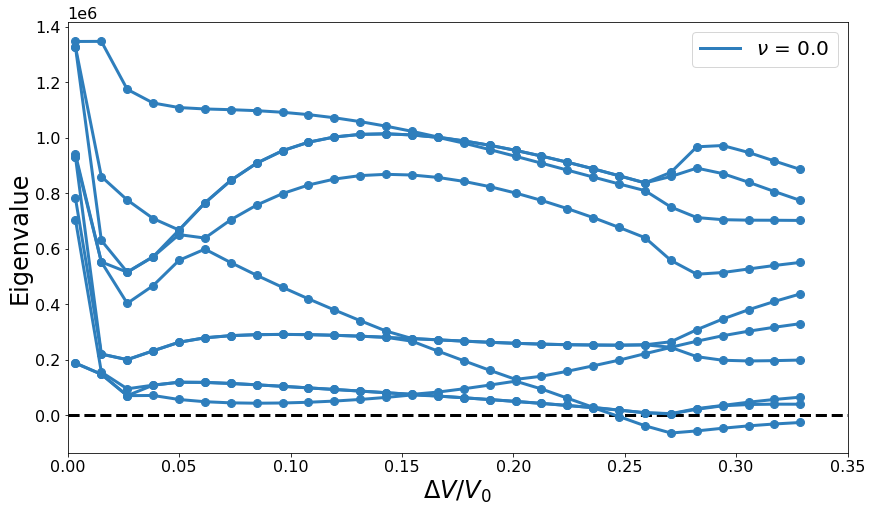

In [17]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

initial_idx = 240

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.35, 'k', '--', linewidth = linewidth_all)

for i,nu in enumerate(nu_try):
    if i==0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot, markersize = markersize_all)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, linewidth = linewidth_all)



ax.legend(loc = 'best', fontsize = fontsize_legend)
ax.set_xlabel('$\Delta V/V_0$', fontsize = fontsize_axes)
ax.set_ylabel('Eigenvalue', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.yaxis.offsetText.set_fontsize(fontsize_ticks)
ax.set_xlim(0,0.35)


# fig.savefig('data_processed/change_nu_4folds_val.jpg')


(-133798.0095703125, 1417157.0837890625)

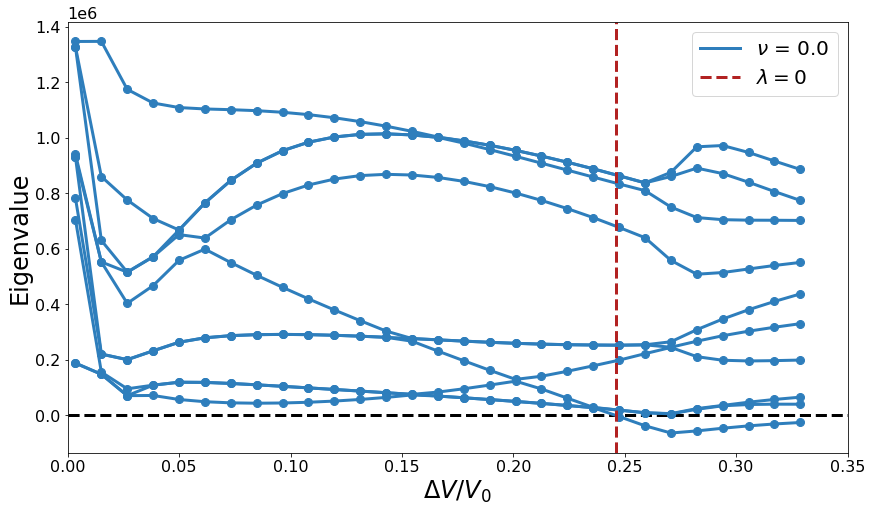

In [66]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

initial_idx = 240

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.35, 'k', '--', linewidth = linewidth_all)

for i,nu in enumerate(nu_try):
    if i==0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot, markersize = markersize_all)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, linewidth = linewidth_all)

ylim_cur = ax.get_ylim()
f = lambda x: np.interp(x,-3*temp_all,freq_all[:,0])
sol_root = root(f,0.25)
ax.vlines(float(sol_root.x),ylim_cur[0], ylim_cur[1], 'firebrick', '--', linewidth = linewidth_all, label = '$\lambda = 0$')

ax.legend(loc = 'best', fontsize = fontsize_legend)
ax.set_xlabel('$\Delta V/V_0$', fontsize = fontsize_axes)
ax.set_ylabel('Eigenvalue', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.yaxis.offsetText.set_fontsize(fontsize_ticks)
ax.set_xlim(0,0.35)
ax.set_ylim(ylim_cur)


# fig.savefig('data_processed/change_nu_4folds_val.jpg')


In [89]:
def smooth_pv_data(pressure, window_len = 100):
    # window_len = 100
    poly_order = 2
    len_pressure, num_exp = np.shape(pressure)

    pressure_smooth = np.zeros((len_pressure, num_exp))

    for i in range(num_exp):
        pressure_smooth[:,i] = savgol_filter(pressure[:,i], window_len, poly_order)
    
    return pressure_smooth

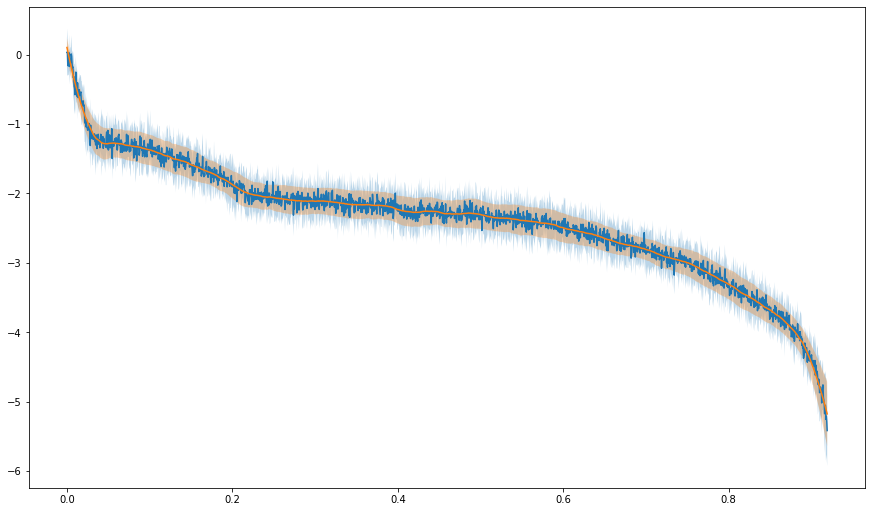

In [99]:
'''load exp data'''
data_all = np.loadtxt('exp_results/PV_4f_Fig1_exp.csv', skiprows = 2, delimiter = ',')
vol_all = data_all[:,0]

pressure_4_mean = np.mean(data_all[:,1:], axis = 1)
pressure_4_exp_std = np.std(data_all[:,1:], axis = 1)

pressure_4_smooth = smooth_pv_data(data_all[:,1:], 120)
pressure_4_smooth_mean = np.mean(pressure_4_smooth, axis = 1)
pressure_4_smooth_std = np.std(pressure_4_smooth, axis = 1)


#note: checked and this is averaged correctly w/o any extra volume stuff

R = 10 #mm
H = 18 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_0 = pressure_4_mean[0]

'''load sim data'''
E_try = [1.4]
t_try = [0.56]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 400

#plot exp
ax.plot(vol_all/vol_0, pressure_4_mean, label = 'Experiment: 4 folds')
ax.fill_between(vol_all/vol_0, pressure_4_mean + pressure_4_exp_std, pressure_4_mean - pressure_4_exp_std, alpha = 0.3)

ax.plot(vol_all/vol_0, pressure_4_smooth_mean, label = 'Experiment: 4 folds')
ax.fill_between(vol_all/vol_0, pressure_4_smooth_mean + pressure_4_smooth_std, pressure_4_smooth_mean - pressure_4_smooth_std, alpha = 0.3)
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

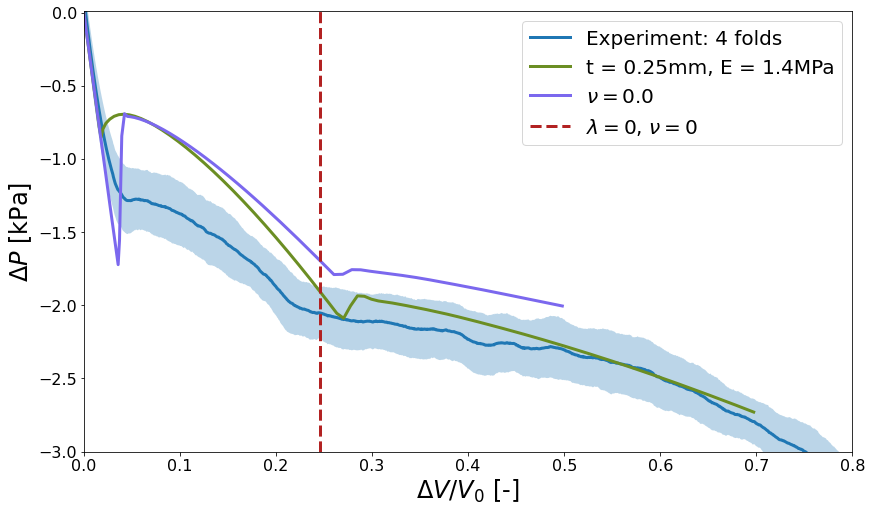

In [105]:
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

'''load exp data'''
data_all = np.loadtxt('exp_results/PV_4f_Fig1_exp.csv', skiprows = 2, delimiter = ',')
vol_all = data_all[:,0]

pressure_4_mean = np.mean(data_all[:,1:], axis = 1)
pressure_4_exp_std = np.std(data_all[:,1:], axis = 1)

pressure_4_smooth = smooth_pv_data(data_all[:,1:], 120)
pressure_4_smooth_mean = np.mean(pressure_4_smooth, axis = 1)
pressure_4_smooth_std = np.std(pressure_4_smooth, axis = 1)


#note: checked and this is averaged correctly w/o any extra volume stuff

R = 10 #mm
H = 18 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_0 = pressure_4_mean[0]

#plot exp
# ax.plot(vol_all/vol_0, pressure_4_mean, label = 'Experiment: 4 folds')
# ax.fill_between(vol_all/vol_0, pressure_4_mean + pressure_4_exp_std, pressure_4_mean - pressure_4_exp_std, alpha = 0.3)

ax.plot(vol_all/vol_0, pressure_4_smooth_mean, label = 'Experiment: 4 folds', linewidth = linewidth_all)
ax.fill_between(vol_all/vol_0, pressure_4_smooth_mean + pressure_4_smooth_std, pressure_4_smooth_mean - pressure_4_smooth_std, alpha = 0.3)
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

'''load sim data'''
#plot nu = 0.5 up to \delta V/V_0 = 0.7 for fitted parameters
t, E = (0.25, 1.4)
data_cur = np.loadtxt(f'data_out/4fold-fitting-400_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = 'olivedrab', linewidth = linewidth_all)


#plot nu = 0.0 up to \delta V/V_0 = 0.5 for fitted parameters
nu = 0.0
data_path = f'data_out/4fold-test_nu-100_pcav_cvol.txt'
data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
ax.plot(vol_norm,pressure_kpa, label = rf'$\nu = {nu}$', color = 'mediumslateblue', linewidth = linewidth_all)

#set parameters for plot
ax.set_xlabel('$\Delta V/V_0$ [-]', fontsize = fontsize_axes)
ax.set_ylabel('$\Delta P$ [kPa]', fontsize = fontsize_axes)
ax.set_xlim(left = 0, right = 0.8)
ax.set_ylim(top = 0.01, bottom = -3)
ax.tick_params(labelsize = fontsize_ticks)
ax.yaxis.offsetText.set_fontsize(fontsize_ticks)

ylim_cur = ax.get_ylim()
ax.vlines(float(sol_root.x),ylim_cur[0], ylim_cur[1], 'firebrick', '--', linewidth = linewidth_all, label = r'$\lambda = 0$, $\nu = 0$')

ax.legend(loc = 'best', fontsize = fontsize_legend)

(0.0, 0.35)

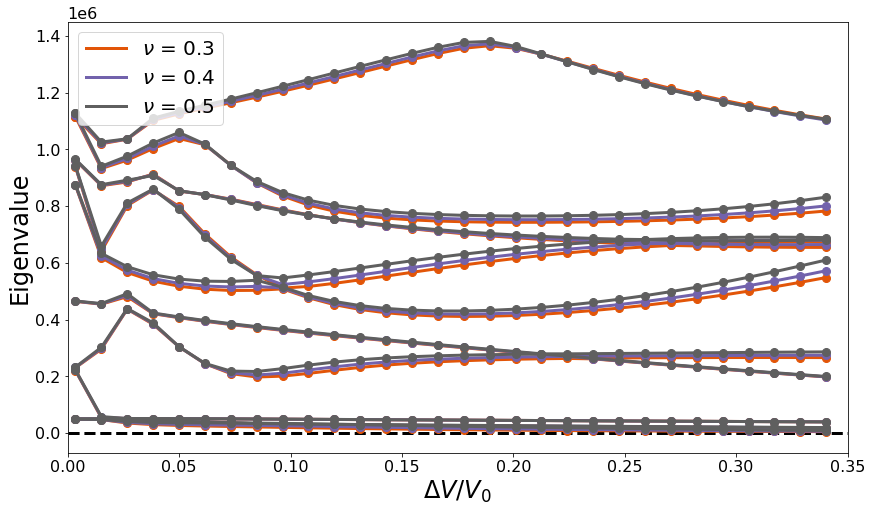

In [19]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

initial_idx = 300

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.35, 'k', '--', linewidth = linewidth_all)

for i,nu in enumerate(nu_try):
    if i > 2:
        idx_cur = initial_idx + i
        data_path = f'data_out/2fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot, markersize = markersize_all)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, linewidth = linewidth_all)



ax.legend(loc = 'best', fontsize = fontsize_legend)
ax.set_xlabel('$\Delta V/V_0$', fontsize = fontsize_axes)
ax.set_ylabel('Eigenvalue', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.yaxis.offsetText.set_fontsize(fontsize_ticks)
ax.set_xlim(0,0.35)


# fig.savefig('data_processed/change_nu_2folds_val.jpg')


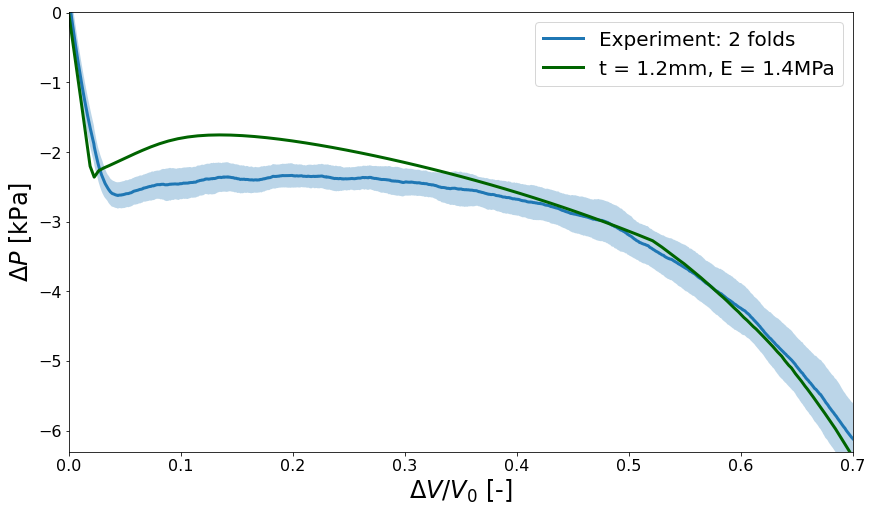

In [110]:
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

'''exp data'''
data_all = np.loadtxt('exp_results/PV_2f_Fig1_exp.csv', skiprows = 2, delimiter = ',')
vol_all = data_all[:,0]
pressure_2 = data_all[:,1:]
pressure_2_smooth = smooth_pv_data(pressure_2)
pressure_2_smooth_mean = np.mean(pressure_2_smooth, axis = 1)
pressure_2_smooth_std = np.std(pressure_2_smooth, axis = 1)

R = 8.8 #mm
H = 44.75 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL

ax.plot(vol_all/vol_0, pressure_2_smooth_mean, label = 'Experiment: 2 folds', linewidth = linewidth_all)
ax.fill_between(vol_all/vol_0, pressure_2_smooth_mean + pressure_2_smooth_std, pressure_2_smooth_mean - pressure_2_smooth_std, alpha = 0.3)

'''sim data'''
E, t = (1.4, 1.2)
data_cur = np.loadtxt(f'data_out/2fold-fitting-300_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = 'darkgreen', linewidth = linewidth_all)


ax.legend(loc = 'best', fontsize = fontsize_legend);
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -6.3)

ax.set_xlabel('$\Delta V/V_0$ [-]', fontsize = fontsize_axes)
ax.set_ylabel('$\Delta P$ [kPa]', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)